In [214]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

#### Data Preparation

In [279]:
## do a list comprehension to return all the csv.
files = [file for file in os.listdir('./sales_data/')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [289]:
### concat all the files in one pd.

path=   './sales_data/'

all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+file)
    all_data = pd.concat([all_data,current_df])
    
all_data.shape

(186850, 6)

In [292]:
## save all_data 
all_data.to_csv('./sales_data/all_data.csv',index=False)

In [295]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [298]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [299]:
all_data = all_data.dropna(how='all')

In [301]:
all_data.shape

(186305, 6)

#### Best Month of Sales

In [303]:
## Example of split on base of '/'

'04/19/19 08:46	'.split('/')

['04', '19', '19 08:46\t']

In [304]:
##getting the month. i.e first index

'04/19/19 08:46	'.split('/')[0]

'04'

In [305]:
### Now, Write a function and apply to Order Date , to split the month and store in another column.

def month(x):
    return x.split('/')[0]

In [306]:
##Applying the Function to Order Date

all_data['month'] = all_data['Order Date'].apply(month)

In [307]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [308]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [310]:
## filter to remove any non numeric values .

filter=all_data['month']=='Order Date'
all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [311]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [312]:
##covert month to intType.
all_data['month']=all_data['month'].astype(int)

In [313]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [319]:
##covert the Quantity Ordered  to int
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [320]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [321]:
## Convert the Price Each to float.
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [322]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [325]:
## calculate best sales

all_data['sales'] =all_data['Quantity Ordered']*all_data['Price Each']

In [326]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [330]:
### Call a groupby on the Months with there respected sales.

month_sales = all_data.groupby('month')['sales'].sum()
month_sales

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

([<matplotlib.axis.XTick at 0x24f9c05afd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

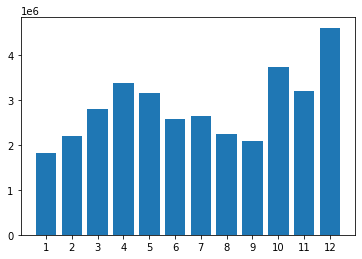

In [333]:
month_sales = range(1,13)
plt.bar(month_sales, all_data.groupby('month')['sales'].sum())
plt.xticks(month_sales)